## Mall Customer Dataset using DBSCAN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [7]:
df = pd.read_csv('Downloads\Mall_Customers.csv', index_col=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [8]:
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
df.drop(['Gender'], axis=1, inplace=True)
df.drop(['Age'], axis=1, inplace=True)
df.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40


In [12]:
df = df.sample(frac=1)
df.head()

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
180,93,90
57,44,50
111,63,52
35,33,14
179,93,14


In [33]:
px.histogram(df, y = 'Spending Score (1-100)', color = 'Annual Income (k$)')

In [22]:
from numpy import unique
from numpy import where
data_x = df.iloc[:,[0,1]].values

In [23]:
model = DBSCAN(eps=0.7, min_samples=90)

In [24]:
yhat = model.fit_predict(data_x)

In [25]:
clusters = unique(yhat)

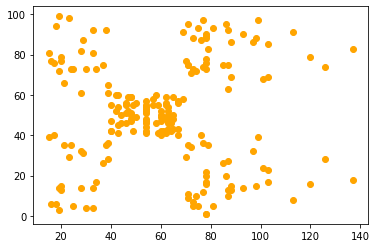

In [31]:
for cluster in clusters:
    row_ix = where(yhat == cluster)
    plt.scatter(data_x[row_ix, 0], data_x[row_ix, 1], color = 'Orange')
plt.show()